# Climate Analysis

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

conn = engine.connect()

In [6]:
# reflect an existing database into a new model

base = automap_base()

# reflect the tables

base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precip = pd.read_sql("SELECT * FROM Measurement", conn)

precip_df = precip.rename(columns={"id" : "ID", "station" : "Station", "date" : "Date", "prcp" : "Precipitation", "tobs" : "Time of Observation Bias"})

precip_df.head()

,ID,Station,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [13]:
station = pd.read_sql("SELECT * FROM Station", conn)

station_df = station.rename(columns={"id" : "ID", "station" : "Station", "name" : "Name", "latitude" : "Latitude", "longitude" : "Longitude", "elevation" : "Elevation"})

station_df.head(10)

,ID,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
merged_df = pd.merge(station_df, precip_df, on="Station", how="inner")

merged_df.head(10)

,ID_x,Station,Name,Latitude,Longitude,Elevation,ID_y,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0
5,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,6,2010-01-07,0.06,70.0
6,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,7,2010-01-08,0.00,64.0
7,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,8,2010-01-09,0.00,68.0
8,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,9,2010-01-10,0.00,73.0
9,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,10,2010-01-11,0.01,64.0


In [16]:
clean_df = merged_df.drop(columns = ["ID_x", "ID_y"])

clean_df.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [17]:
# Calculate the date 1 year ago from the last data point in the database

clean_df.sort_values(by="Date", ascending=False).head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
19549,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2017-08-23,0.45,76.0
12186,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-23,0.08,82.0
2723,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-23,0.00,81.0
7634,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2017-08-23,0.00,82.0
12185,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-22,0.00,82.0


In [18]:
# Perform a query to retrieve the data and precipitation scores

past_year = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= '2016-08-23').\
filter(measurement.date <= '2017-08-23').\
order_by(measurement.date).all()

past_year_df = pd.DataFrame(past_year)

# Renaming
annual_precip = past_year_df.rename(columns={"date" : "Date", "prcp" : "Precipitation"})

annual_precip.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_data = pd.DataFrame(data=annual_precip).set_index("Date")

# Sort the dataframe by date

precipitation_data.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


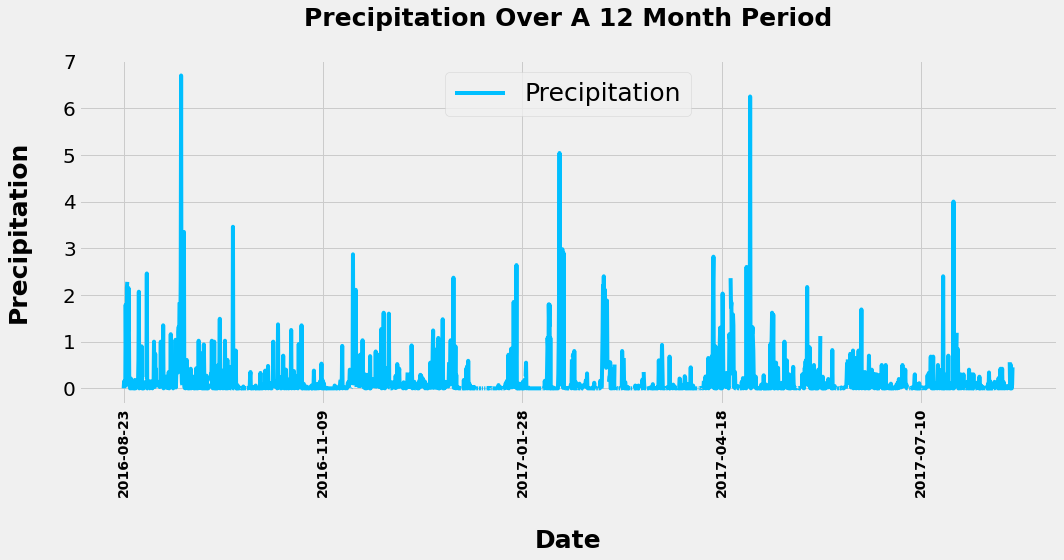

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

plot_data = precipitation_data.plot(figsize = (15, 8), color = 'deepskyblue', alpha = 1.0);

plot_data.set_xlabel("\nDate", weight="bold", size=25);
plot_data.set_ylabel("Precipitation\n", weight="bold", size=25);
plot_data.set_title("Precipitation Over A 12 Month Period\n", weight="bold", size=25);


plt.xticks(rotation=90, fontsize=14, weight="bold")
plt.yticks(fontsize=20)

plt.legend(loc="upper center", fontsize=25)

plt.tight_layout()

plt.savefig("Precipitation_Over_Past_12_Months.png")

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stats = precipitation_data.describe()

summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
# Design a query to show how many stations are available in this dataset?

stations_available = session.query(station.name).count()

print(f"---- THERE ARE [{stations_available}] AVAILABLE STATIONS IN HAWAII ----")

---- THERE ARE [9] AVAILABLE STATIONS IN HAWAII ----


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

list_of_stations = session.query(measurement.station, station.name,
                                  func.count(measurement.station)).\
filter(measurement.station == station.station).\
group_by(measurement.station)

active_stations = pd.DataFrame(data= list_of_stations, columns =["Station ID", "Station Name/Location", "Count of Active Stations"])

active_stations_data = active_stations.sort_values(by= "Count of Active Stations", ascending=False)

active_stations_data

,Station ID,Station Name/Location,Count of Active Stations
6,USC00519281,"WAIHEE 837.5, HI US",2772
7,USC00519397,"WAIKIKI 717.2, HI US",2724
1,USC00513117,"KANEOHE 838.1, HI US",2709
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
4,USC00517948,"PEARL CITY, HI US",1372
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp = session.query(measurement.station, station.name, func.min(measurement.tobs)).\
filter(measurement.station==station.station)

highest_temp = session.query(measurement.station, station.name, func.max(measurement.tobs)).\
filter(measurement.station==station.station)

print(f"Lowest Temperature Recorded From Most Active Station: \nLocation of Station - {lowest_temp[0][1]}")
print(f"Station ID - {lowest_temp[0][0]}")
print(f"\nHighest Temperature Recorded From Most Active Station: \nLocation of Station - {highest_temp[0][1]}") 
print(f"Station ID - {highest_temp[0][0]}")

temp_max_active_station = session.query(measurement.station, station.name, func.avg(measurement.tobs)).\
filter(measurement.station==station.station).\
group_by(measurement.station).\
filter(measurement.station == 'USC00519281')

avg_temp_highest_station = round(temp_max_active_station[0][2])

print(f"\nAverage Temperature Recorded From The Most Active Station: \n{avg_temp_highest_station} Degrees in Farenheit")

Lowest Temperature Recorded From Most Active Station: 
Location of Station - HONOLULU OBSERVATORY 702.2, HI US
Station ID - USC00511918

Highest Temperature Recorded From Most Active Station: 
Location of Station - WAIKIKI 717.2, HI US
Station ID - USC00519397

Average Temperature Recorded From The Most Active Station: 
72 Degrees in Farenheit


In [38]:
clean_df.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [39]:
# Choose the station with the highest number of temperature observations.

temps_over_12_months = session.query(measurement.station, station.name, measurement.date, measurement.tobs).\
filter(measurement.station == station.station).\
filter(measurement.station == "USC00519281").\
filter(measurement.date >= "2016-08-23").\
filter(measurement.date <= "2017-08-23").\
order_by(measurement.date).all()


highest_temps_over_12_months = pd.DataFrame(temps_over_12_months)

highest_temps_over_12_months_df = highest_temps_over_12_months.rename(columns={"station" : "Station", "name" : "Name", "date" : "Date", "tobs" : "Time of Observation Bias"})

highest_temps_over_12_months_df.head(10)

,Station,Name,Date,Time of Observation Bias
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
5,USC00519281,"WAIHEE 837.5, HI US",2016-08-28,73.0
6,USC00519281,"WAIHEE 837.5, HI US",2016-08-29,78.0
7,USC00519281,"WAIHEE 837.5, HI US",2016-08-30,77.0
8,USC00519281,"WAIHEE 837.5, HI US",2016-08-31,78.0
9,USC00519281,"WAIHEE 837.5, HI US",2016-09-01,80.0


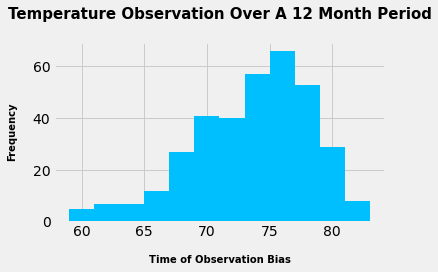

In [40]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.hist(highest_temps_over_12_months_df["Time of Observation Bias"],bins=12, color="deepskyblue", alpha=1.0);

plt.title("Temperature Observation Over A 12 Month Period\n", weight="bold", size=15);
plt.xlabel("\nTime of Observation Bias", weight="bold", size=10);
plt.ylabel("Frequency\n", weight="bold", size=10)

plt.tight_layout()

plt.savefig("Temps_Over_12_Months.png")